<h1> Regression </h1>

#### структура
- Введение - зачем нужна регрессия
- Постановка задачи
- Линейная регрессия пример решения
- Вспомним про нормальное распределение. Его свойства. Цпт. Работы Гальтона и Фишера.
- Линейная регрессия - вывод через правдоподобие
- Линейная регрессия с нелинейными базисными функциями
- Переобучение. Регуляризация.
- bias variance trade_off
- Вероятностный взгляд на регуляризацию


Что почитать

https://habr.com/company/ods/blog/323890/

https://habr.com/company/ods/blog/322076/

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Для чего нужна регрессия?
- Чтобы узнать зависимость 

![](1.jpg)


- что будет с акциями завтра?
- как быстро к вам доберется курьер или такси подаст машину?
- сколько будет стоить квартира с определенной площадью и удаленностью до метро?

Чуток формальнее
- $X$ - матрица-описание объектов, дизайн-матрица;
- $Y$ - матрица-характеристики объектов;
- $f$ - зависимость - некоторый метод подсчета характеристик объектов основываясь на их описании;
- $\left(X, Y = f\left(X\right)\right)$ - наблюдения;
- $S = \left\{X_i, Y_i\right\}_{i=1}^N$ - обучающая выборка - набор $N$ наблюдений - пары (описание объекта - значение);
- $\hat f$ - регрессионная модель - функция которая аппроксимирует исходную зависимость $f$.

В общем случае линейная регрессия моделируется так:

$$
y_i = w_0 + w_1 * x_{i1} + ... + w_m * x_{im} + \epsilon 
$$

Где $\epsilon$ - шум, обычно предполагают $\epsilon \sim \mathcal{N}(0,\,\sigma^{2})$ - с нулевым средним.

Задача сводится к ее обучению (поиску коэффициентов) для некоторой метрики.

##### 1. Инженеристое решение

In [4]:
np.random.seed(1132)

X = np.random.rand(60) * 30
y = X * 3 + 6 + np.random.normal(scale=10, size=X.shape)

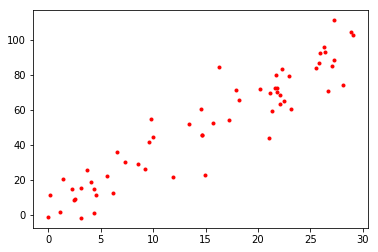

In [5]:
plt.plot(X, y, 'r.')

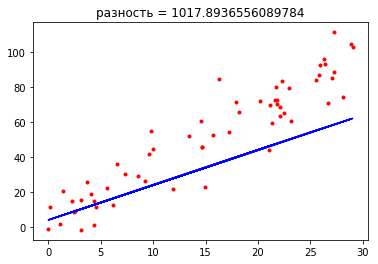

In [6]:
plt.plot(X, y, 'r.')
y_hat = X * 2 + 4
plt.plot(X, y_hat, 'b-')
plt.title('разность = {}'.format(np.sqrt(np.sum(y_hat - y)**2)));

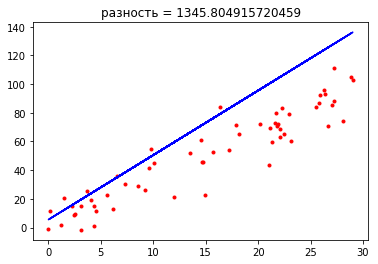

In [7]:
plt.plot(X, y, 'r.')
y_hat = X * 4.5 + 5.5
plt.plot(X, y_hat, 'b-')
plt.title('разность = {}'.format(np.sqrt(np.sum(y_hat - y)**2)));

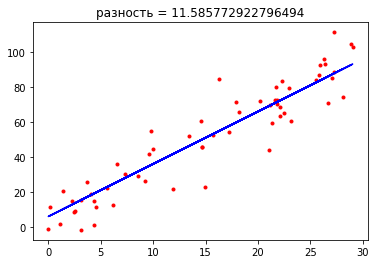

In [8]:
plt.plot(X, y, 'r.')
y_hat = X * 3 + 6
plt.plot(X, y_hat, 'b-')
plt.title('разность = {}'.format(np.sqrt(np.sum(y_hat - y)**2)));

##### Как выбрать оптимальзую прямую при условии, что в жизни точки не лежат на одной прямой из-за (например) погрешности изменений или неучтенных факторов ?

$$
ERROR(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i)\ \right)
$$

$$
ERROR(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i)\ \right) ^ 2
$$

$$
ERROR(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left|\ y_i - \hat{f}(x_i)\ \right|
$$

$$
ERROR(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left|\ \log(y_i) - \log(\hat{f}(x_i))\ \right|
$$

В общем случае линейная регрессия моделируется так:

$$
y_i = w_0 + w_1 * x_{i1} + ... + w_m * x_{im} + \epsilon 
$$

Где $\epsilon$ - шум, обычно предполагают $\epsilon \sim \mathcal{N}(0,\,\sigma^{2})$ - с нулевым средним.

Задача сводится к ее обучению (поиску коэффициентов) для некоторой метрики.

Чтобы обучать регрессионные модели нужно определиться с тем как измерять качество предсказаний.

Обозначим за $\hat{f}$ - прогноз модели, за y - истинные ответы, за $L(y,\hat{f})$ - отклонение прогноза a от истинного ответа y.

Основной способ измерить отклонение - посчитать квадрат отклонений

$$
L(y,\hat{f}) = (y - \hat{f}) ^ 2
$$

Квадрат отклонения - дифференцируемая выпуклая функция. Наиболее часто встречается в задачах регрессии.

- Основанный на ней функционал называется MSE (Mean Squared Error)

$$
MSE(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i)\ \right) ^ 2
$$


- MAE (Mean Absolute Error)

$$
MAE(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left|\ y_i - \hat{f}(x_i)\ \right|
$$


- $R^2$ - коэффициент детерминации, показывает долю объясненной дисперсии (т.е. доля дисперсии объясненная моделью) в общей дисперсии целевой переменной. Данный коэффициент принимает значение от 0 до 1 (чем ближе к 1, тем лучше модель объясняет данные)

(https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8)

$$
R^2(\hat{f}, x) = 1 - \frac{\sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i)\ \right) ^ 2}{\sum_{i=1}^{N}\left(\ y_i - \bar{y}\ \right) ^ 2} 
$$

$\bar{y} = \frac{1}{N}\sum_{i=1}^{N} y_i$ 

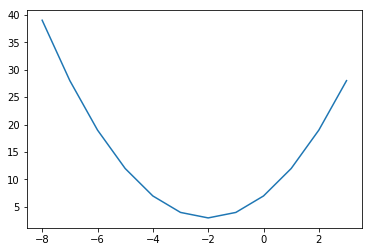

In [9]:
# - как найти минимум фукнции f(x) ?

def f(x):
    return (x + 2) ** 2 + 3

plt.plot(range(-8, 4), [f(i) for i in range(-8, 4)])

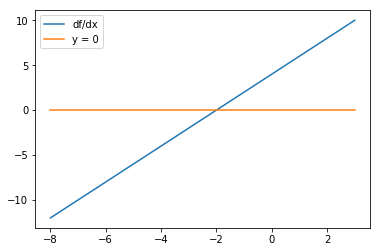

In [11]:
def df_dx(x):
    return 2 * (x + 2)

plt.plot(range(-8, 4), [ df_dx(i) for i in range(-8, 4) ], label='df/dx')
plt.plot(range(-8, 4), [ 0 for i in range(-8, 4) ], label='y = 0')
plt.legend()

$$
\hat{y} = k * x + b
\\
Q(x) = \sum_{i=0}^{N}{(y_i - \hat{y_i})^2}
\\
Q(x) = \sum_{i=0}^{N}(y_i - k * x_i - b) ^ 2
\\
\frac{d Q(x)}{d k} = 2 * \sum_{i=0}^{N}(y_i - k * x_i - b) * (- x_i) = 0 
\\
\frac{d Q(x)}{d b} = 2 * \sum_{i=0}^{N}(y_i - k * x_i - b) * (-1) = 0
\\
$$

k: 
$$
\frac{d Q(x)}{d k} = - 2 * \sum_{i=0}^{N}(y_i * x_i - k * x_i ^ 2 - b * x_i) = 0
\\
\frac{d Q(x)}{d k} = \sum_{i=0}^{N}(y_i * x_i) - \sum_{i=0}^{N} (k * x_i ^ 2) - \sum_{i=0}^{N}( b * x_i) = 0
\\
k * \sum_{i=0}^{N} (x_i ^ 2) + b * \sum_{i=0}^{N}( x_i) =  \sum_{i=0}^{N}(y_i * x_i)
$$

b:
$$
\frac{d Q(x)}{d b} = 2 * \sum_{i=0}^{N}(y_i - k * x_i - b) * (-1) = 0
\\
\sum_{i=0}^{N}(y_i - b) =  \sum_{i=0}^{N}(k * x_i)
\\
\sum_{i=0}^{N}y_i = N * b + k * \sum_{i=0}^{N}(x_i)
$$

$$
\begin{cases}
k * \sum_{i=0}^{N} (x_i ^ 2) + b * \sum_{i=0}^{N}( x_i) =  \sum_{i=0}^{N}(y_i * x_i)
\\
\\
\sum_{i=0}^{N}y_i = N * b + k * \sum_{i=0}^{N}(x_i)
\\
\end{cases}
$$

Обозначим
$$
\bar{x} = \frac{1}{N}\sum_{i=0}^{N} x_i
\\
\bar{y} = \frac{1}{N}\sum_{i=0}^{N} y_i
\\
\overline{xy} = \frac{1}{N}\sum_{i=0}^{N} y_i*x_i
\\
\overline{x^2} = \frac{1}{N}\sum_{i=0}^{N} x_i^2
\\
$$


$$
\begin{cases}
b * \overline{x} + k * \overline{x^2} = \overline{xy}
\\
\\
\overline{y} = b + k *  \overline{x}
\\
\end{cases}
$$

выразим b подставим в первое уравнение получим


$$
k = \frac{\overline{xy} - \overline{x} \overline{y}}{\overline{x^2} - \overline{x}^2}
\\
b = \overline{y} - k *  \overline{x}
\\
$$

In [12]:
!head ./weight-height.csv

# https://www.kaggle.com/mustafaali96/weight-height

In [13]:
wh_dataset = np.loadtxt('./weight-height.csv', delimiter=',', skiprows=1, usecols=[1, 2])

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('./weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
wh_dataset = df.loc[df.Gender=='Male', ['Height', 'Weight']].values

In [17]:
X = wh_dataset[:, 0]
y = wh_dataset[:, 1]

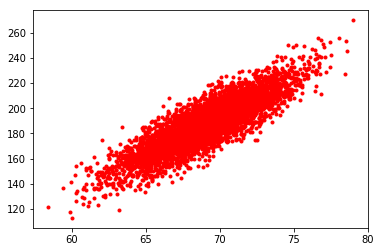

In [18]:
plt.plot(X, y, 'r.')

In [19]:
X = np.vstack([np.ones(X.shape), X])

In [20]:
X = X.T

In [21]:
X[:4, :]

array([[ 1.        , 73.84701702],
       [ 1.        , 68.78190405],
       [ 1.        , 74.11010539],
       [ 1.        , 71.7309784 ]])

$$
y = w_0 + w_1 * x_1 + ... + w_m * x_m + \epsilon
$$
X - матрица
w - вектор-столбец коэффициентов.
$$
y = X  w + \epsilon
\\
L = || y - X w ||^2
\\
w^* = argmin\ L
$$
$w^*$ - оптимальные параметры



$$
Q = (y - Xw)^\top\ (y - Xw)
\\
\frac{d Q}{d w} = -2y^\top X + 2 w^\top X^\top X = 0
$$

https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf - книжка с готовыми рецептами про матрички


$$
w^\top X^\top X = y^\top X
\\
X^\top X w = X^\top y
$$
$ \left(\mathbf{X}^\top \mathbf{X}\right) - $ инвертируема?

$$ 
\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y}
$$

$ \left(\mathbf{X}^\top \mathbf{X}\right) - $ инвертируема?

1) Она квадратная

2) Определитель - не нулевой, если все столбцы линейно независимы.

3) какова сложность операции обращения матрицы?


А если наша матрица не инвертируема? Значит что у нее есть некоторые линейно зависимые столбцы

$$
\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X} + \alpha I \right)^{-1} \mathbf{X}^\top \mathbf{y} 
$$

Время трюков

$$
\mathbf{y} = \mathbf{X}\mathbf{w}
$$
$\mathbf{X}$ - матрица полного столбцового ранга ?

Тогда мы можем взять всевдообратную матрицу 
$\left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top$

$$
\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y} 
$$


https://ru.wikipedia.org/wiki/%D0%9F%D1%81%D0%B5%D0%B2%D0%B4%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0

In [22]:
w = (np.linalg.inv((X.T @ X)) @ X.T) @ y.reshape((y.shape[0], -1)) 
w = w.flatten()

In [23]:
w

array([-224.49884071,    5.96177381])

In [24]:
y_hat = (X @ w).reshape(-1)

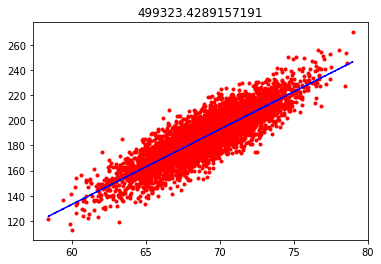

In [25]:
plt.plot(X[:, 1], y, 'r.')
plt.plot(X[:, 1], y_hat, 'b--')
plt.title( np.sum( (y - y_hat) ** 2 ) );

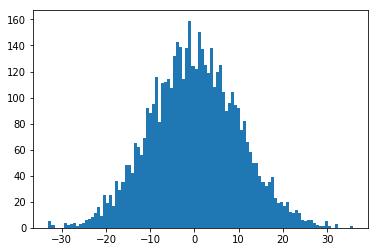

In [26]:
plt.hist(y - y_hat, bins=100);

In [27]:
np.mean(y - y_hat), np.std(y - y_hat)

(-1.473806037211034e-11, 9.993231998865223)

Наша модель вроде ловит зависимость, но в данных есть некоторый "шум", который мы не можем учесть.

В нашем случае наверняка есть какие то факторы / признаки / свойства объектов - которых у нас нет. 

Поэтому можно просто считать их шумом (погрешностью измерений) и попытаться их моделировать нормальным распределением.


![](./regression_bayes.png)

credits for image to https://habr.com/post/276355/

$$
\mathcal{N}(y|\mu, \sigma^2) =  \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y-\mu)^2}{2\sigma^2}\right),
$$

##### Нормальное распределение

Рост человека, вес человека, отклонение при стрельбе от центра мишени, итд

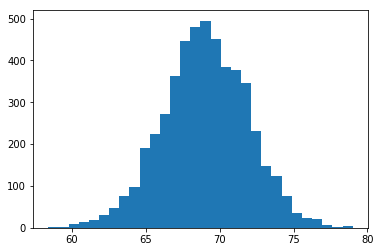

In [34]:
plt.hist(df.loc[df.Gender=='Male', 'Height'].values, bins=30);

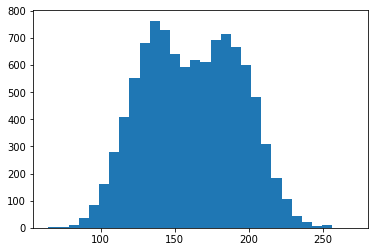

In [41]:
plt.hist(df.loc[:, 'Weight'].values, bins=30);

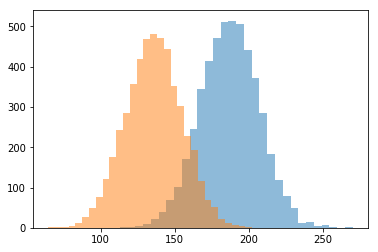

In [47]:
plt.hist(df.loc[df.Gender=='Male', 'Weight'].values, bins=30, alpha=0.5);
plt.hist(df.loc[df.Gender=='Female', 'Weight'].values, bins=30, alpha=0.5);

# Переход в многомерное нелинейное пространство

### Как сделать регрессию линейной если зависимость нелинейная?

-   $\mathbf{x}$ может зависеть не совсем линейно от $\mathbf{y}$.

-   Перейдем в новое пространство - $\phi(\mathbf{x})$ где $\phi(\cdot)$ это нелинейная функция от $\mathbf{x}$.

-   Возьмем линейную комбинацию этих нелинейных функций $$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x}).$$

-   Возьмем некотрый базис функций (например квадратичный базис)
    $$\boldsymbol{\phi} = [1, x, x^2].$$

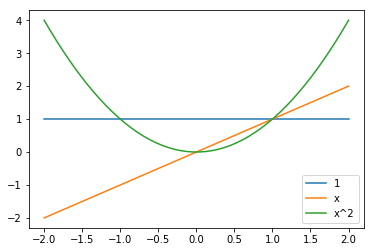

In [21]:
plt.plot(np.linspace(-2, 2), [1 for x in np.linspace(-2, 2)], label='1')
plt.plot(np.linspace(-2, 2), [x for x in np.linspace(-2, 2)], label='x')
plt.plot(np.linspace(-2, 2), [x**2 for x in np.linspace(-2, 2)], label='x^2')
plt.legend();

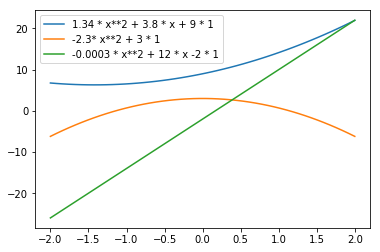

In [22]:
plt.plot(np.linspace(-2, 2), 
         [1.34 * x**2 + 3.8 * x + 9 * 1 
          for x in np.linspace(-2, 2)], 
         label='1.34 * x**2 + 3.8 * x + 9 * 1')

plt.plot(np.linspace(-2, 2), 
         [-2.3* x**2 + 3 * 1 
          for x in np.linspace(-2, 2)],
         label='-2.3* x**2 + 3 * 1')

plt.plot(np.linspace(-2, 2), 
         [-0.0003 * x**2 + 12 * x -2 * 1 
          for x in np.linspace(-2, 2)], 
         label='-0.0003 * x**2 + 12 * x -2 * 1')

plt.legend();

RBF 

https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B4%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE-%D0%B1%D0%B0%D0%B7%D0%B8%D1%81%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F

No handles with labels found to put in legend.


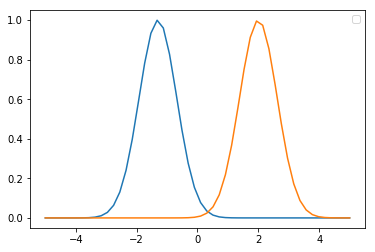

In [23]:
plt.plot(np.linspace(-5, 5), 
         [np.exp(-1.3 * (x + 1.3)**2 )
          for x in np.linspace(-5, 5)]);

plt.plot(np.linspace(-5, 5), 
         [np.exp( -1.3 * (x - 2)**2)
          for x in np.linspace(-5, 5)]);

plt.legend();

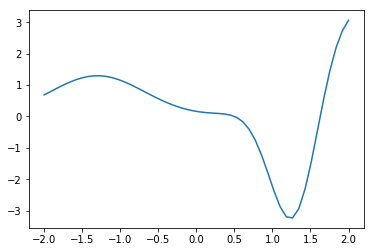

In [24]:
plt.plot(np.linspace(-2, 2), 
         [ 1.3 * np.exp(-1.3 * (x + 1.3)**2 ) + 3.5 * np.exp( -1.3 * (x - 2)**2)  - 5 * np.exp( - 5 * (x - 1.3)**2)
          for x in np.linspace(-2, 2)], label = 'o!');

-   Теперь наша функция имеет такой вид
    $$f(\mathbf{x}_i) = \sum_{j=1}^m w_j \phi_{i, j} (x_i).$$


In [25]:
X = np.linspace(-5, 5)
y = -1.21 * X ** 3 - 2 * X - 5 +  np.random.rand(X.shape[0]) * 10

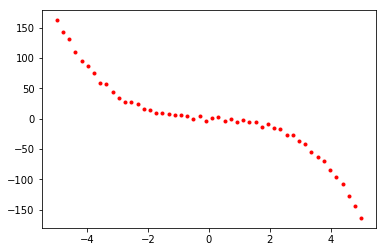

In [26]:
plt.plot(X, y, 'r.')

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
lr = LinearRegression(fit_intercept=True)
pf = PolynomialFeatures(degree=3)

In [29]:
X_poly = pf.fit_transform(X.reshape(-1, 1))
X_poly.shape

(50, 4)

In [30]:
X_poly = np.hstack([X_poly, np.ones((X_poly.shape[0], 1)) ])
X_poly[:4]

array([[   1.        ,   -5.        ,   25.        , -125.        ,
           1.        ],
       [   1.        ,   -4.79591837,   23.00083299, -110.31011738,
           1.        ],
       [   1.        ,   -4.59183673,   21.0849646 ,  -96.81871499,
           1.        ],
       [   1.        ,   -4.3877551 ,   19.25239484,  -84.47479367,
           1.        ]])

In [31]:
lr.fit(X_poly, y)
y_pred = lr.predict(X_poly)

# обучим и предскажем на тех же данных чтобы увидеть что модель достаточно 
# сложная и способна ловить нелинейные зависимости

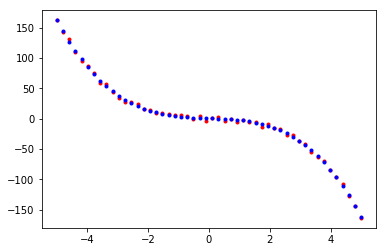

In [32]:
plt.plot(X, y, 'r.')
plt.plot(X, y_pred, 'b.');

> по факту мы только что подобрали такую поверхность с помощью линейной регрессии, отображая куда данные мы можем их линейно аппроксимировать

# Регуляризация

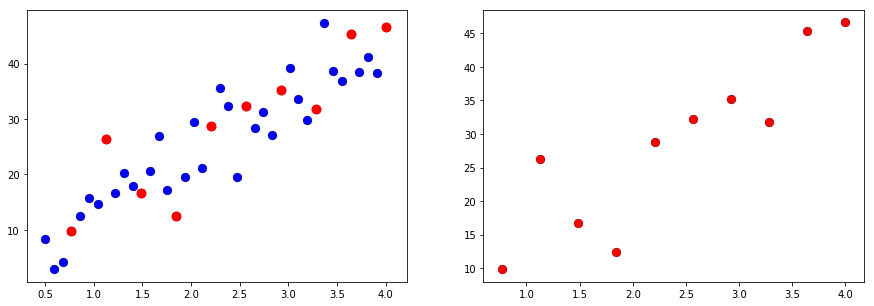

In [33]:
a = 5
b = 10
n_points = 40
x_min = 0.5
x_max = 4

x = np.linspace(x_min, x_max, n_points)[:, np.newaxis]
completely_random_number = 33
rs = np.random.RandomState(completely_random_number)
noise = rs.normal(0, 5, (n_points, 1))

y = a + b * x + noise
idx = np.arange(3,40,4)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x,y, s=80, c ='b', edgecolors='k', linewidths=0.3);
plt.scatter(x[idx],y[idx], s=80, c='r');
plt.subplot(1,2,2)
plt.scatter(x[idx],y[idx], s=80, c ='r', edgecolors='k', linewidths=0.3);

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [35]:

x_train = x[idx]
y_train = y[idx]

lr_linear = LinearRegression(fit_intercept=True)
lr_linear.fit(x_train, y_train)
y_linear = lr_linear.predict(x_train)

# Cubic 
cubic = PolynomialFeatures(degree=3)
x_cubic = cubic.fit_transform(x_train)

lr_3 = LinearRegression(fit_intercept=False)
lr_3.fit(x_cubic, y_train)
y_cubic = lr_3.predict(x_cubic)


# 9'th fit
poly = PolynomialFeatures(degree=9)
x_poly = poly.fit_transform(x_train)

lr_9 = LinearRegression(fit_intercept=False)
lr_9.fit(x_poly, y_train)
y_poly = lr_9.predict(x_poly)

In [36]:
# PREDICTION ON WHOLE DATA

# linear prediction

y_pred_linear = lr_linear.predict(x)

# cubic prediction

x_cubic_test = cubic.transform(x)
y_pred_cubic = lr_3.predict(x_cubic_test)

# poly 9 prediction

x_poly_test = poly.transform(x)
y_pred_poly = lr_9.predict(x_poly_test)

In [37]:
def simple_plot(x, y, y_regression, test_idx=None):
    plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
    plt.plot(x,y_regression);
    if test_idx is not None:
        plt.scatter(x[test_idx], y[test_idx], s=80, c ='b', edgecolors='k', linewidths=0.3);
    plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

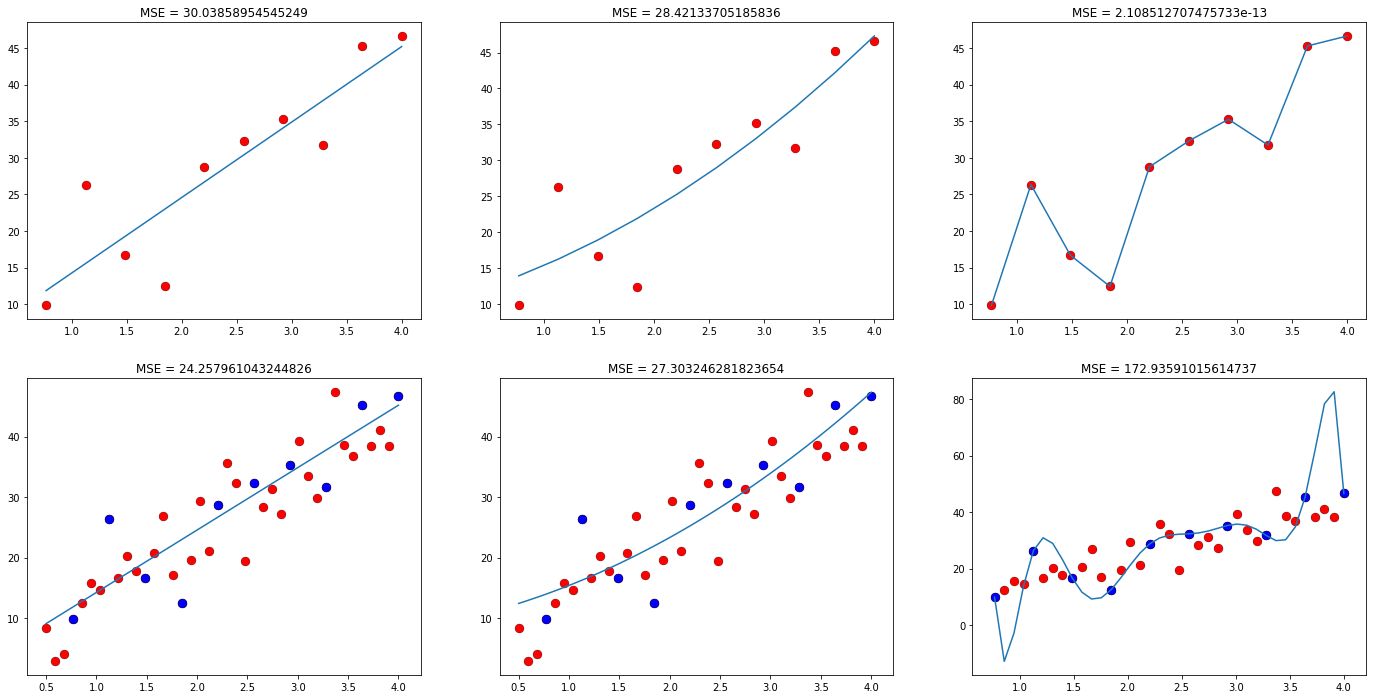

In [39]:
# PLOT PICTURES

plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
simple_plot(x_train,y_train,y_linear)
plt.subplot(2,3,2)
simple_plot(x_train,y_train,y_cubic)
plt.subplot(2,3,3)
simple_plot(x_train,y_train,y_poly)


plt.subplot(2,3,4)
simple_plot(x,y,y_pred_linear, test_idx=idx)
plt.subplot(2,3,5)
simple_plot(x,y,y_pred_cubic, test_idx=idx)
plt.subplot(2,3,6)
simple_plot(x[3:],y[3:],y_pred_poly[3:], test_idx=idx-3)


# FIRST ROW is TEST data set, SECOD ROW is WHOLE data

> Переобучаемся под обучающую выборку - слишком "хорошая модель" которая может ловить мега-нелинейные зависимости, которых на самом деле нет.


>> Большие коэффициенты делают возможным сильное изменение величины при небольшом изменении признаков.


##### Подход 0.

- Упростить модель.
- Добавить больше данных в обучающую выборку

##### Подход 1.

- Давайте запретим нашим коэффициентам быть большими!

$$
Q_{reg}(\hat{f}, x) = Q(\hat{f}, x) + \alpha * R(w) \to min
\\
$$


Можно просто добавить некоторый функционал который будет зависеть от весов регрессии

$$
MSE(\hat{f}, x) = \left|\left| \ y - X w\ \right|\right|^2_2 + \left|\left| w \right|\right|^2_2 \ \to min
$$

https://ru.wikipedia.org/wiki/Норма_(математика)



Выражение 

$$
\sum_{i=0}^{N}\left(y_i - (w_2 * x_i ^ 2 + w_1 * x_i + w_0) \right) ^ 2 + \alpha \sum_{j=1}^{2}\left(w_i\right)^2 \to min
$$

эквивалентно в случае выпуклого функционала MSE

Почему можно увидеть тут :(https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0)
и тут
(https://ru.wikipedia.org/wiki/%D0%A3%D1%81%D0%BB%D0%BE%D0%B2%D0%B8%D1%8F_%D0%9A%D0%B0%D1%80%D1%83%D1%88%D0%B0_%E2%80%94_%D0%9A%D1%83%D0%BD%D0%B0_%E2%80%94_%D0%A2%D0%B0%D0%BA%D0%BA%D0%B5%D1%80%D0%B0)

$$
\begin{cases}
\sum_{i=0}^{N}\left(y_i - (w_2 * x_i ^ 2 + w_1 * x_i + w_0) \right) ^ 2 \to min
\\
\\
\sum_{j=1}^{2}\left(w_i\right)^2 \leq C
\\
\end{cases}
$$


То есть мы хотим минимизировать наш функционал MSE, но при этом сделать это так, чтобы у нас веса регрессии были как можно меньше. (Почему мы не занижаем $w_0$ ?
(Если у нас нет информации что свободная переменная должна быть близкой к нулю то смысла нет.))

Такой вид регрессии называется Ridge Regression - гребневая.

Почему гребневая?

$$
\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X} + \alpha E \right)^{-1} \mathbf{X}^\top \mathbf{y} 
$$

Либо в качестве слагаемого отвечающего за регуляризацию можно добавить сумму модулей значений весов и минимизировать их.

$$
MSE(\hat{f}, x) = \left|\left| \ y - X w\ \right|\right|^2_2 + \left|\left| w \right|\right|_1 \ \to min
$$

$$
\sum_{i=0}^{N}\left(y_i - (w_2 * x_i ^ 2 + w_1 * x_i + w_0) \right) ^ 2 + \alpha \sum_{j=1}^{2}\left|w_i\right| \to min
$$

$$
\begin{cases}
\sum_{i=0}^{N}\left(y_i - (w_2 * x_i ^ 2 + w_1 * x_i + w_0) \right) ^ 2 \to min
\\
\\
\sum_{j=1}^{2}\left|w_i\right | \leq C
\\
\end{cases}
$$


Такая регрессия называется Lasso Regression

![](regularization.png)

кажется рисунок из книжки 
https://web.stanford.edu/~hastie/ElemStatLearn/

1) мы смещаем наши оптимальные оценки на веса регрессии (w или betta  в зависимости от обозначения) - ближе к нулю.
т.е. задаем априорные знания о весах в модель - говорим ей что веса должны быть ближе к нулю.

2) видно что модуль в большинстве случаем жестко зануляет веса некоторых признаков в отличие от квадрата - таким образом происходит отбор более значимых признаков - т.е. признаки с небольшими весами - не очень интересны.

3) что еще можно сказать про регуляризацию ?

##### Пример

In [40]:
from sklearn import datasets, linear_model, cross_validation
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

/home/twsea/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
diabetes = datasets.load_diabetes()

In [288]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [289]:
X = diabetes.data[:, 2]
y = diabetes.target

In [290]:
X = X[:, np.newaxis]
X.shape

(442, 1)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [293]:
regr.coef_

array([998.57768914])

In [297]:
for alpha in [0.01, 0.05, 0.1, 1.0]:
    regr = linear_model.Ridge(alpha=alpha)
    regr.fit(X_train, y_train)
    print(alpha, regr.coef_)
    
# alpha - Larger values specify stronger regularization.

0.01 [986.043813]
0.05 [938.90432397]
0.1 [885.96076171]
1.0 [439.68363588]


In [298]:
for alpha in [0.01, 0.05, 0.1, 1.0]:
    regr = linear_model.Lasso(alpha=alpha)
    regr.fit(X_train, y_train)
    print(alpha, regr.coef_)
    
# alpha - Larger values specify stronger regularization.

0.01 [994.09060832]
0.05 [976.14228505]
0.1 [953.70688097]
1.0 [549.86960746]


In [299]:
r2_score(y_test, regr.predict(X_test))

0.2354238815402785

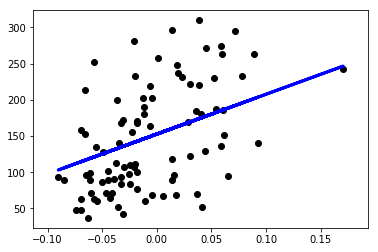

In [300]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.show()

In [301]:
np.logspace(-4, -.5, 30)

array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])

In [302]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

regr = linear_model.LinearRegressionion()
alphas = np.logspace(-4, -.5, 30)
scores = list()
scores_std = list()

this_scores = cross_validation.cross_val_score(
    regr, X, y, n_jobs=1, cv=5,
    scoring=make_scorer(r2_score, greater_is_better=True)
)

np.mean(this_scores), '+/-', np.std(this_scores)

(0.3959870468225839, '+/-', 0.11876400738281549)

In [303]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = linear_model.Lasso()
alphas = np.logspace(-4, -.5, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(
        lasso, X, y, n_jobs=1, cv=5,
        scoring=make_scorer(r2_score, greater_is_better=True)
    )
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

/home/amir/venv/ds_venv3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/amir/venv/ds_venv3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


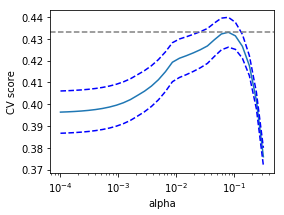

In [304]:
plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

plt.show()

In [305]:
scores[np.argmax(scores)], '+/-', scores_std[np.argmax(scores)], 'alpha=', alphas[np.argmax(scores)]

(0.4329899202589983, '+/-', 0.08378285534540969, 'alpha=', 0.07880462815669913)

In [306]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

ridge = linear_model.Ridge()
alphas = np.logspace(-4, -.5, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    ridge.alpha = alpha
    this_scores = cross_validation.cross_val_score(
        ridge, X, y, n_jobs=1, cv=5,
        scoring=make_scorer(r2_score, greater_is_better=True)
    )
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

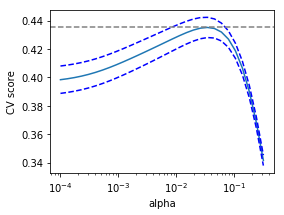

In [307]:
plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

plt.show()

In [308]:
scores[np.argmax(scores)], '+/-', scores_std[np.argmax(scores)], 'alpha=', alphas[np.argmax(scores)]

(0.4351282800421372, '+/-', 0.08711627831368471, 'alpha=', 0.03423597957607583)

__________

# Appendix кому интересно

В задаче линейной регрессии мы предполагаем, что данные пораждаются следующим процессом:

$$ \Large y = \vec{w}^T \vec{x} + \epsilon$$

- $y$ - целевая переменная
- $\vec{w}$ - вектор параметров модели
- $\vec{x}$ -  вектор признаков объекта
- $\epsilon \sim \mathcal{N}(0,\,\sigma^{2})
$ - случайная ошибка, полученная из нормального распределения с нулевым матожиданием

На выходе из эксперимента мы имеем набор данных из $N$ объектов $\{\vec{x}_n\}$ и соответствующие им результаты измерений $\{y_n\}$. Наша задача сводится к определению коэффициентов регрессии $\vec{w}$.

# Максимизация правдоподобия (likelihood)

Для решения этой задачи нам нужно определиться с метрикой качества, которая покажет степень соответствия данной модели и тренировочных данных. Для этого воспользуемся методом максимизации правдоподобия.

Правдоподобием называют вероятность того, что данная выборка была семплирована из данного распределения. Если объекты независимы и одинаково распределённы, то правдоподобие вычисляется как:
$$
    \Large
    \mathcal {L}_\theta = \prod_{i=1}^{N} P_\theta(\vec{x}_i)
$$

Т.к. большенство распределений параметрические, правдоподобие удобно использовать для того, чтобы оценить параметры распределения из которого появилась выборка. Для этого нужно найти такое $\theta$ при котором правдоподобие будет максимальным. 

Посмотрим на нашу модель с вероятностной точки зрения.
<img src="./imgs/2.png" alt="Bishop, Pattern Recognition and Machine Learning, 2006" style="width: 500px;"/>

$$
\Large 
y = \mathbb{E}\left[ p(t|x,w,\sigma^{2}) \right]
$$

Выпишем фунцию правдоподобия для нашего набора данных. Сразу возьмем логарифм правдоподобия, т.к. он поможет нам избавиться от произведения и степени экспоненты в нормальном распределении
$$
\Large 
\begin{array}{rcl}
 \log \left(\mathcal {L}\right) 
              &=& \log \prod_{i=1}^{N} \mathcal{N}(\vec{w}^T \vec{x}_i,\,\sigma^{2}) \\
              &=& \sum_{i=1}^n \log \mathcal{N}\left( \vec{w}^T \vec{x}_i, \sigma^2 \right) \\ 
              &=& \sum_{i=1}^n \log \frac {1}{\sigma {\sqrt {2\pi}}}\;e^{-{\frac {(y_i-\vec{w}^T \vec{x}_i )^{2}}{2\sigma ^{2}}}} \\
              &=& -n \log \sigma {\sqrt {2\pi}} -\frac{1}{2\sigma^2} \sum_{i=1}^n 
                  \left(y_i - \vec{w}^T \vec{x}_i\right)^2
\end{array}
$$

Таким образом задача сводится к максимизации правдоподобия.
$$
\Large 
\begin{array}{rcl}
\hat{w} &=& \arg \max_{w} log\left(\mathcal {L}\right) \\ 
        &=& \arg \max_{w} -n \log \sigma {\sqrt {2\pi}} -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\ 
        &=& \arg \max_{w} - \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\ 
        &=& \arg \min_{w} L\left(X, \vec{y}, \vec{w}\right)
\end{array}
$$

# ВИДИМ ЧТО В ФУНКЦИИ ОШИБКИ - квадратичный лосс?

Если бы брали не нормальное распределение, а распределение лапласса - то увидили бы лосс на MAE

# Аналитическое решение

Для того, чтобы найти веса $\vec{w}$ приравняем к нулю производную функции потерь $L$

$$
\Large 
\begin{array}{rcl} 
\frac{\partial L}{\partial \vec{w}} = 0 
    &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\ 
    &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\ 
    &\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\ 
    &\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y} 
\end{array}
$$

Недостатки аналитического решения:
- Вырожденность матрицы $X^TX$
- Вычислительная сложность обращения матрицы
- Вычислительная стабильность операции обращения